## 2. Questions
2. 

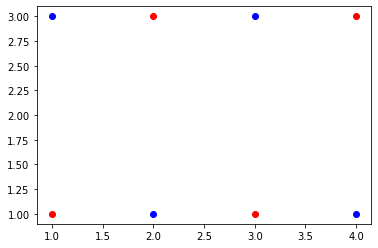

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.scatter([1,2,3,4],[1,3,1,3],color='red')
plt.scatter([1,2,3,4],[3,1,3,1],color='blue')

3.

In [3]:
from google.colab import drive
drive.mount('/content/drive')
with open('/content/drive/My Drive/Colab Notebooks/CS760/data/Druns.txt', 'r') as f: 
    data3 = np.genfromtxt(f, dtype='f4', delimiter=' ',skip_header=1)
X3 = data3[:,0:-1]
y3 = data3[:,-1]

Mounted at /content/drive


In [4]:
data3

array([[ 0., -1.,  1.],
       [ 0.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  2.,  0.],
       [ 0.,  3.,  0.],
       [ 0.,  4.,  0.],
       [ 0.,  5.,  0.],
       [ 0.,  6.,  1.],
       [ 0.,  7.,  0.],
       [ 0.,  8.,  1.]], dtype=float32)

In [5]:
def entele(x,y):
  if(x == 0):
    return 0
  else:
    return -(x/y)*np.log2(x/y)

In [6]:
def entro_split(x, i, j): #x: two col; i: 0 or 1; j: smaller or equal to size of set
  c = x[j,i]
  num_then = 0;
  num_else = 0;
  size = x.shape[0]
  #print(size)
  for ele in x:
    if ele[i]>=c:
      num_then+=1
    else:
      num_else+=1
  #print(num_then)
  #print(num_else)
  if num_then == size:
    return 0
  if num_else == size:
    return 0
  return -(num_then/size)*np.log2(num_then/size)-(num_else/size)*np.log2(num_else/size)
    

In [7]:
def entro(data):
  num_0 = 0
  num_1 = 0
  size = data.shape[0]
  for ele in data:
    if ele[-1] == 0:
      num_0+=1
    else:
      num_1+=1
  #print(size)
  #print(num_0)
  #print(num_1)
  if num_0 == size:
    return 0
  if num_1 == size:
    return 0
  return -(num_0/size)*np.log2(num_0/size)-(num_1/size)*np.log2(num_1/size)
    


In [8]:
def infogain(x, i, j):
  c = x[j,i]
  numthen0 = 0
  numthen1 = 0
  numelse0 = 0
  numelse1 = 0
  size = x.shape[0]
  for ele in x:
    if ele[i]>=c:
      if ele[-1] == 0:
        numthen0 += 1
      else:
        numthen1 += 1
    else:
      if ele[-1] == 0:
        numelse0 += 1
      else:
        numelse1 += 1
  return entro(x)-((numthen0+numthen1)/size)*(entele(numthen0,numthen0+numthen1)+entele(numthen1,numthen0+numthen1)) - ((numelse0+numelse1)/size)*(entele(numelse0,numelse0+numelse1)+entele(numelse1,numelse0+numelse1))

In [9]:
def igratio(x, i, j):
  if entro_split(x, i, j) == 0:
     return 0
  return infogain(x, i, j)/entro_split(x, i, j)

x component only has one value, zero, so split $x\geq 0$ has gain info ratio:

In [10]:
igratio(data3, 0, 0)

0

y conponent ranges from -1 to 8, with info gain ratio respectively:

In [11]:
for k in range(data3.shape[0]):
  print(k)
  print(igratio(data3, 1, k))

0
0
1
0.4125984252687806
2
0.044697525822735895
3
0.0018356606418111876
4
0.0059757407302527595
5
0.034851554559677256
6
0.09400833241463322
7
0.2174437568503179
8
0.04469752582273597
9
0.4125984252687806


In [12]:
print(infogain(data3, 0, 0))
print(infogain(data3, 1, 0))

0.0
0.0


4. 

In [13]:
with open('/content/drive/My Drive/Colab Notebooks/CS760/data/D3leaves.txt', 'r') as f: 
    data4 = np.genfromtxt(f, dtype='f4', delimiter=' ',skip_header=1)

In [14]:
data4

array([[10.,  2.,  1.],
       [10.,  3.,  1.],
       [ 1.,  1.,  0.],
       [ 1.,  3.,  1.]], dtype=float32)

In [15]:
igratio(data4, 0, 0)

0.31127812445913283

In [16]:
igratio(data4, 0, 2)

0

In [17]:
igratio(data4, 1, 0)

1.0

In [18]:
igratio(data4, 1, 1)

0.31127812445913283

In [19]:
igratio(data4, 1, 2)

0

First split: $x[1]\geq2$, Now we have we our first leave $[1, 1, 0]$. Take a closer look at the rest items, they all have the same label, so the rest items also make a leave.

5. 

In [20]:
nodelayer = 0;
allc = []
def best_split(x):
  #check for stop criteria
  if np.size(x) == 0:
    print("leave: y = 1");
    return
  bestsofar = 0;
  besti = 0;
  bestj = 0;
  entsplitflag = 0;
  for j in range(x.shape[0]):
    if igratio(x, 0, j)>bestsofar:
      bexti = 0;
      bestj = j;
      bestsofar = igratio(x, 0, j);
    if entro_split(x, 0, j) != 0:
      entsplitflag = 1;
  for j in range(x.shape[0]):
    if igratio(x, 1, j)>bestsofar:
      besti = 1;
      bestj = j;
      bestsofar = igratio(x, 1, j);
    if entro_split(x, 1, j) != 0:
      entsplitflag = 1;
  #Second criteria
  if bestsofar == 0:
    print("leave: y = ", labelmaj(x));
    return
  #Third criteria
  if entsplitflag == 0:
    print("leave: y = ", labelmaj(x));
    return
  if besti == 0:
    print("if x >=", x[bestj, 0]);
    allc.append([0, x[bestj, 0]])
  else:
    print("if y >=", x[bestj, 1]);
    allc.append([1, x[bestj, 0]])
  
  xthen, xelse = subset(x, besti, bestj);
  print ("then, ")
  #print(xthen)
  best_split(xthen)
  print ("else, ")
  best_split(xelse)

In [21]:
def labelmaj(x):
  num1 = 0;
  num0 = 0;
  for ele in x:
    if ele[-1] == 1:
      num1+=1
    else:
      num0+=1
  if num1>=num0:
    return 1
  else:
    return 0

In [22]:
def subset(x, i, j):
  xthen = []
  xelse = []
  c = x[j, i]
  for ele in x:
    if ele[i]>=c:
      xthen.append(ele)
    else:
      xelse.append(ele)
  return np.array(xthen), np.array(xelse)

In [23]:
subset(data4, 1, 0)

(array([[10.,  2.,  1.],
        [10.,  3.,  1.],
        [ 1.,  3.,  1.]], dtype=float32), array([[1., 1., 0.]], dtype=float32))

In [24]:
best_split(data4)

if y >= 2.0
then, 
leave: y =  1
else, 
leave: y =  0


In [25]:
with open('/content/drive/My Drive/Colab Notebooks/CS760/data/D1.txt', 'r') as f: 
    data51 = np.genfromtxt(f, dtype='f4', delimiter=' ',skip_header=1)

In [26]:
best_split(data51)

if y >= 0.201829
then, 
leave: y =  1
else, 
leave: y =  0


In [27]:
with open('/content/drive/My Drive/Colab Notebooks/CS760/data/D2.txt', 'r') as f: 
    data52 = np.genfromtxt(f, dtype='f4', delimiter=' ',skip_header=1)

In [28]:
allc = []
best_split(data52)

if x >= 0.533076
then, 
if y >= 0.228007
then, 
if y >= 0.424906
then, 
leave: y =  1
else, 
if x >= 0.708127
then, 
leave: y =  1
else, 
if y >= 0.32625
then, 
if x >= 0.595471
then, 
if x >= 0.646007
then, 
leave: y =  1
else, 
if y >= 0.403494
then, 
leave: y =  1
else, 
leave: y =  0
else, 
leave: y =  0
else, 
leave: y =  0
else, 
if x >= 0.887224
then, 
if y >= 0.037708
then, 
if y >= 0.082895
then, 
leave: y =  1
else, 
if x >= 0.960783
then, 
leave: y =  1
else, 
leave: y =  0
else, 
leave: y =  0
else, 
if x >= 0.850316
then, 
if y >= 0.169053
then, 
leave: y =  1
else, 
leave: y =  0
else, 
leave: y =  0
else, 
if y >= 0.91985
then, 
leave: y =  1
else, 
if y >= 0.691474
then, 
if x >= 0.111076
then, 
if x >= 0.254049
then, 
leave: y =  1
else, 
if y >= 0.864128
then, 
leave: y =  1
else, 
if y >= 0.792752
then, 
if x >= 0.191915
then, 
leave: y =  1
else, 
leave: y =  0
else, 
leave: y =  0
else, 
leave: y =  0
else, 
if y >= 0.534979
then, 
if x >= 0.426073
then, 
leave: y 

6.

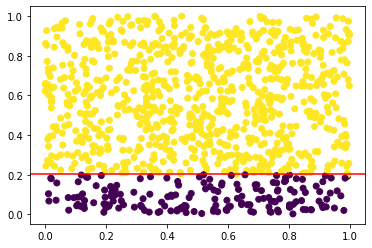

In [29]:
plt.scatter(data51[:, 0],data51[:, 1],c = data51[:, 2])
plt.axhline(y = 0.201829, color = 'r')

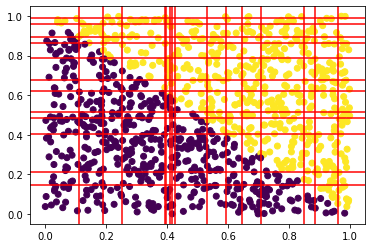

In [30]:
plt.scatter(data52[:, 0],data52[:, 1],c = data52[:, 2])
for ele in allc:
  if ele[0] == 0:
    plt.axvline(x = ele[1], color = 'r')
  else:
    plt.axhline(y = ele[1], color = 'r')

7.
First deal with data:

In [31]:
with open('/content/drive/My Drive/Colab Notebooks/CS760/data/Dbig.txt', 'r') as f: 
    data7 = np.genfromtxt(f, dtype='f4', delimiter=' ',skip_header=1);

In [32]:
data7.shape

(9999, 3)

In [33]:
ran = np.random.permutation(data7.shape[0])

In [34]:
i = 0
D32 = []
for index in ran:
  D32.append(data7[index, :])
  i+=1
  if(i>=32):
    break
D32 = np.array(D32)
D32.shape

(32, 3)

In [35]:
i = 0
D128 = []
for index in ran:
  D128.append(data7[index, :])
  i+=1
  if(i>=128):
    break
D128 = np.array(D128)
D128.shape

(128, 3)

In [36]:
i = 0
D512 = []
for index in ran:
  D512.append(data7[index, :])
  i+=1
  if(i>=512):
    break
D512 = np.array(D512)
D512.shape

(512, 3)

In [37]:
i = 0
D2048 = []
for index in ran:
  D2048.append(data7[index, :])
  i+=1
  if(i>=2048):
    break
D2048 = np.array(D2048)
D2048.shape

(2048, 3)

In [38]:
i = 0
D8192 = []
Dtest = []
for index in ran:
  if(i<8192):
    D8192.append(data7[index, :])
    i+=1
  else:
    Dtest.append(data7[index, :])
    i+=1
D8192 = np.array(D8192)
D8192.shape
Dtest = np.array(Dtest)
D8192.shape

(8192, 3)

In [39]:

def best_split_mod(x):
  #check for stop criteria
  if np.size(x) == 0:
    return
  bestsofar = 0;
  besti = 0;
  bestj = 0;
  entsplitflag = 0;
  for j in range(x.shape[0]):
    if igratio(x, 0, j)>bestsofar:
      bexti = 0;
      bestj = j;
      bestsofar = igratio(x, 0, j);
    if entro_split(x, 0, j) != 0:
      entsplitflag = 1;
  for j in range(x.shape[0]):
    if igratio(x, 1, j)>bestsofar:
      besti = 1;
      bestj = j;
      bestsofar = igratio(x, 1, j);
    if entro_split(x, 1, j) != 0:
      entsplitflag = 1;
  #Second criteria
  if bestsofar == 0:
    return
  #Third criteria
  if entsplitflag == 0:
    return
  if besti == 0:
    allc.append([0, x[bestj, 0]])
  else:
    allc.append([1, x[bestj, 0]])
  xthen, xelse = subset(x, besti, bestj);
  best_split_mod(xthen)
  best_split_mod(xelse)

In [40]:
allc = []
best_split_mod(D32)
c32 = allc

In [41]:
allc = []
best_split_mod(D128)
c128 = allc

In [42]:
allc = []
best_split_mod(D512);
c512 = allc

In [43]:
allc = []
best_split_mod(D2048)
c2048 = allc

In [44]:
allc = []
best_split_mod(D8192)
c8192= allc

KeyboardInterrupt: ignored

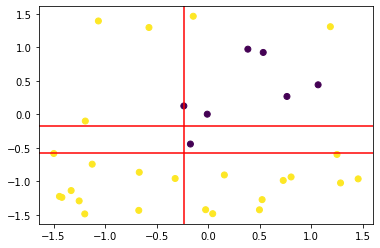

In [45]:
plt.scatter(D32[:, 0],D32[:, 1],c = D32[:, 2])
for ele in c32:
  if ele[0] == 0:
    plt.axvline(x = ele[1], color = 'r')
  else:
    plt.axhline(y = ele[1], color = 'r')

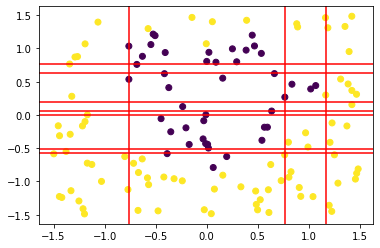

In [46]:
plt.scatter(D128[:, 0],D128[:, 1],c = D128[:, 2])
for ele in c128:
  if ele[0] == 0:
    plt.axvline(x = ele[1], color = 'r')
  else:
    plt.axhline(y = ele[1], color = 'r')

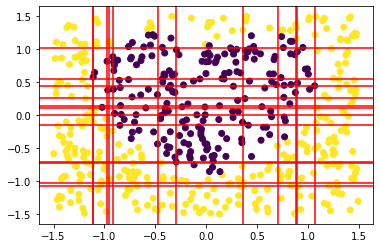

In [47]:
plt.scatter(D512[:, 0],D512[:, 1],c = D512[:, 2])
for ele in c512:
  if ele[0] == 0:
    plt.axvline(x = ele[1], color = 'r')
  else:
    plt.axhline(y = ele[1], color = 'r')

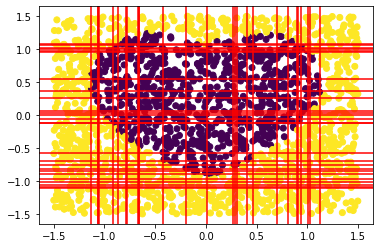

In [48]:
plt.scatter(D2048[:, 0],D2048[:, 1],c = D2048[:, 2])
for ele in c2048:
  if ele[0] == 0:
    plt.axvline(x = ele[1], color = 'r')
  else:
    plt.axhline(y = ele[1], color = 'r')

NameError: ignored

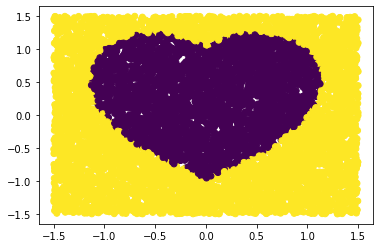

In [49]:

plt.scatter(D8192[:, 0],D8192[:, 1],c = D8192[:, 2])
for ele in c8192:
  if ele[0] == 0:
    plt.axvline(x = ele[1], color = 'r')
  else:
    plt.axhline(y = ele[1], color = 'r')

Q3.

In [50]:
from sklearn import tree
from sklearn.metrics import zero_one_loss
clf1 = tree.DecisionTreeClassifier()
clf1 = clf1.fit(D32[:, 0:2], D32[:, 2])
y_pred1 = clf1.predict(Dtest[:, 0:2])
accuracy1 = zero_one_loss(Dtest[:, 2], y_pred1, normalize = False)
print(accuracy1)
print(clf1.tree_.node_count)

366
7


In [51]:
clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(D128[:, 0:2], D128[:, 2])
y_pred2 = clf2.predict(Dtest[:, 0:2])
accuracy2 = zero_one_loss(Dtest[:, 2], y_pred2, normalize = False)
print(accuracy2)
print(clf2.tree_.node_count)

220
29


In [52]:
clf3 = tree.DecisionTreeClassifier()
clf3 = clf3.fit(D512[:, 0:2], D512[:, 2])
y_pred3 = clf3.predict(Dtest[:, 0:2])
accuracy3 = zero_one_loss(Dtest[:, 2], y_pred3, normalize = False)
print(accuracy3)
print(clf3.tree_.node_count)

89
49


In [53]:
clf4 = tree.DecisionTreeClassifier()
clf4 = clf4.fit(D2048[:, 0:2], D2048[:, 2])
y_pred4 = clf4.predict(Dtest[:, 0:2])
accuracy4 = zero_one_loss(Dtest[:, 2], y_pred4, normalize = False)
print(accuracy4)
print(clf4.tree_.node_count)

49
97


In [54]:
clf5 = tree.DecisionTreeClassifier()
clf5 = clf5.fit(D8192[:, 0:2], D8192[:, 2])
y_pred5 = clf5.predict(Dtest[:, 0:2])
accuracy5 = zero_one_loss(Dtest[:, 2], y_pred5, normalize = False)
print(accuracy5)
print(clf5.tree_.node_count)

27
245


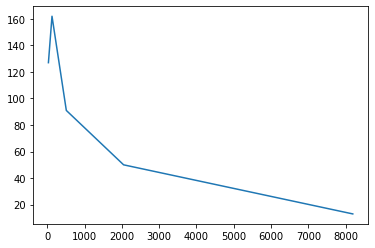

In [55]:
plt.plot([32, 128, 512, 2048, 8192],[127, 162, 91, 50, 13])

Q4

In [56]:
import math
x4 = np.random.uniform(0, 2*math.pi,100)

In [57]:
y4 = np.sin(x4)

In [58]:
xtest = np.random.uniform(0, 2*math.pi,50)
ytest = np.sin(xtest)

In [59]:
from scipy.interpolate import lagrange
poly = lagrange(x4, y4)

In [60]:
def predict(p, x):
  res = 0;
  i = 0;
  for num in p:
    res += num*pow(x, i)
    i+=1
  return res

In [61]:
ypred =[]
for x in xtest:
  ypred.append(predict(poly, x))

In [62]:
poly

poly1d([-1.61803542e-17,  2.82163615e-17, -1.80723492e-14, -4.38445946e-11,
       -3.44414275e-10, -2.11571205e-08, -1.64093944e-05,  2.38453038e-04,
       -5.43022156e-03,  3.59468460e-02,  8.15093994e-01,  4.03393066e+02,
       -4.97448437e+03,  2.40586000e+05, -2.25163200e+06,  2.75424000e+07,
       -2.04899738e+09,  2.48829706e+10, -4.37238890e+11,  4.16103059e+12,
       -5.51092958e+13,  6.03270570e+14, -5.11924024e+15,  9.46452737e+16,
       -6.35219203e+17,  6.39818571e+18, -5.79972504e+19,  4.86295873e+20,
       -2.14996217e+21,  1.60459111e+22, -1.40796864e+23,  3.16290756e+23,
       -1.88739707e+24,  9.72921865e+24, -3.55279864e+25,  3.56136088e+26,
       -8.50446258e+26, -3.19254642e+27, -2.99160028e+28,  3.89307359e+28,
       -1.83692652e+29,  5.27483349e+29, -6.47133156e+30,  1.08917833e+31,
       -4.61076957e+31,  6.58633000e+32, -2.15043802e+33,  3.06150495e+33,
       -1.56325087e+34,  5.20720760e+34, -1.22924713e+35,  1.52172264e+35,
       -2.49167501e+35, 

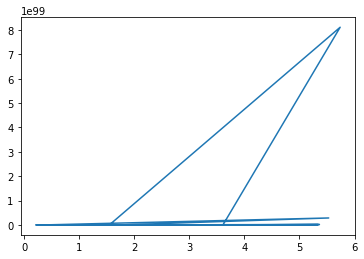

In [63]:
plt.plot(xtest, ypred)

In [64]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ypred,ytest)

1.3177836947604586e+198

mu = 0.1

In [65]:
mu, sigma = 0, 0.1 
error1 = np.random.normal(mu, sigma, 100)
x4_mod1 = x4+error1

In [66]:
poly = lagrange(x4_mod1, y4)

In [67]:
ypred =[]
for x in xtest:
  ypred.append(predict(poly, x))
mean_squared_error(ypred,ytest)

3.0841105044055714e+208

mu = 0.01

In [68]:
mu, sigma = 0, 0.01 
error2 = np.random.normal(mu, sigma, 100)
x4_mod2 = x4+error2

In [69]:
poly = lagrange(x4_mod2, y4)

In [70]:
ypred =[]
for x in xtest:
  ypred.append(predict(poly, x))
mean_squared_error(ypred,ytest)

7.554509177298026e+199

mu = 1.0

In [71]:
mu, sigma = 0, 1.0
error3 = np.random.normal(mu, sigma, 100)
x4_mod3 = x4+error3

In [72]:
poly = lagrange(x4_mod3, y4)

In [73]:
ypred =[]
for x in xtest:
  ypred.append(predict(poly, x))
mean_squared_error(ypred,ytest)

2.089152982141566e+219